In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import user transaction data
appdata = pd.read_csv(r'/content/appdata10.csv')
appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


#### DATA UNDERSTANDING

In [3]:
appdata.shape

(50000, 12)

In [4]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
#screens master data
top_screens = pd.read_csv(r'/content/top_screens.csv')
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [6]:
top_screens.shape

(58, 2)

#### EXPLORATORY DATA ANALYSIS

In [7]:
appdata.enrolled.value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [8]:
appdata.dayofweek.value_counts()

4    7531
0    7515
5    7423
6    7418
1    7139
3    6659
2    6315
Name: dayofweek, dtype: int64

In [9]:
# Assumption : People are more likely to enroll on weekends
pd.crosstab(appdata.dayofweek,appdata.enrolled).apply(lambda r : r/r.sum(), axis = 1)

enrolled,0,1
dayofweek,,
0,0.387092,0.612908
1,0.395574,0.604426
2,0.371496,0.628504
3,0.360565,0.639435
4,0.389855,0.610145
5,0.368854,0.631146
6,0.373686,0.626314


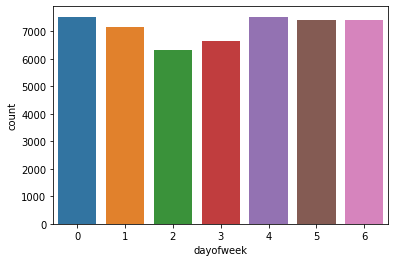

In [10]:
sns.countplot(x = appdata.dayofweek, data = appdata )
# Wrong assumption
# Wednesdays seems to have highest conversion rate
# Thrusdays have highest interaction

In [11]:
import datetime as dt
appdata['first_open'] = pd.to_datetime(appdata['first_open']).dt.date

In [12]:
appdata['first_open'].value_counts()

2013-07-05    396
2013-05-31    366
2013-05-14    348
2013-07-02    342
2013-06-08    338
             ... 
2012-12-14    106
2012-11-28    105
2012-12-17    103
2012-12-13     98
2012-12-02     82
Name: first_open, Length: 229, dtype: int64

In [13]:
appdata['enrolled_date'] = pd.to_datetime(appdata['enrolled_date']).dt.date

In [14]:
appdata['enroll_Diff'] = appdata['enrolled_date'] - appdata['first_open']

In [15]:
appdata['enroll_Diff'].fillna(pd.Timedelta(seconds=0), inplace = True)

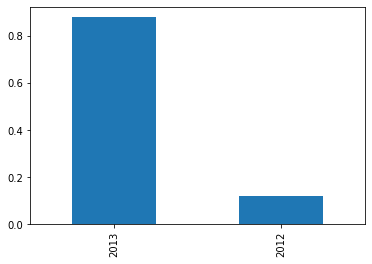

In [16]:
appdata['first_open_year'] = pd.to_datetime(appdata['first_open']).dt.year
appdata['first_open_year'].value_counts(normalize = True).plot(kind = 'bar')

# Most of the data is from 2013

In [17]:
pd.crosstab(appdata.first_open_year,appdata.enrolled).apply(lambda x : x/x.sum(), axis = 1)

enrolled,0,1
first_open_year,,
2012,0.601538,0.398462
2013,0.348206,0.651794


In [18]:
# conversion rate is higher in 2013 compared to 2012.
# But the dataset is imbalanced for reaching to any such conclusion.
# More than 85 % of the dataset is from 2013

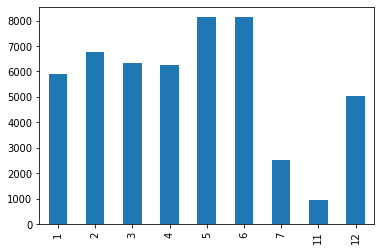

In [19]:
appdata['first_open_month'] = pd.to_datetime(appdata['first_open']).dt.month
appdata['first_open_month'].value_counts().sort_index().plot(kind = 'bar')
# Highest number of users are in May and June.
# 11-12 are from 2012 and seems to be near the launch of the application

In [20]:
pd.crosstab(appdata.first_open_month,appdata.enrolled).apply(lambda x : x/x.sum(), axis =1)

enrolled,0,1
first_open_month,,
1,0.471448,0.528552
2,0.246972,0.753028
3,0.299020,0.700980
4,0.346841,0.653159
5,0.325678,0.674322
6,0.370676,0.629324
7,0.460279,0.539721
11,0.586980,0.413020
12,0.604241,0.395759


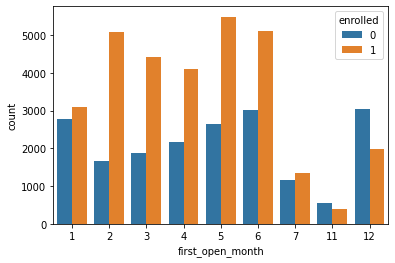

In [21]:
sns.countplot(x = appdata.first_open_month, hue = appdata.enrolled)
# Highest conversion rate is in Feb

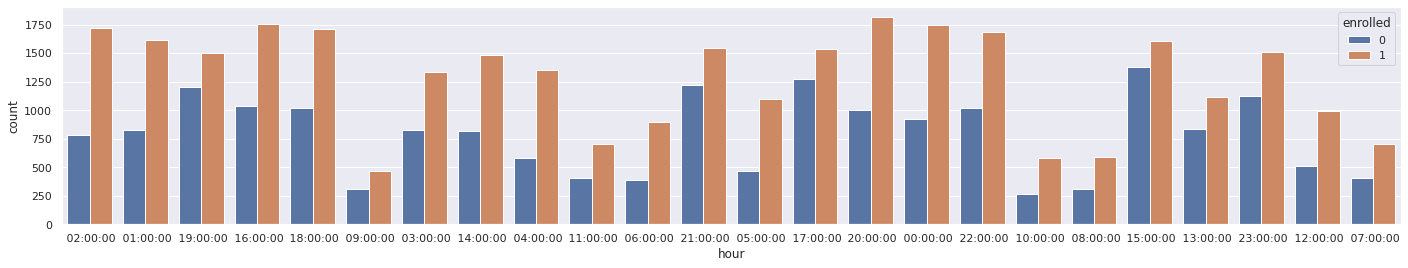

In [22]:
sns.set(rc={'figure.figsize':(24, 4)})
sns.countplot(x = 'hour', data = appdata, hue = 'enrolled')

In [23]:
appdata["hour"] = appdata.hour.str.slice(1, 3).astype(int)

In [24]:
pd.crosstab(appdata['hour'], appdata['enrolled']).apply(lambda x : x/x.sum(), axis = 1)
# Highest conversion is between 4-6

enrolled,0,1
hour,,
0,0.345461,0.654539
1,0.337572,0.662428
2,0.312026,0.687974
3,0.382762,0.617238
4,0.298500,0.701500
5,0.298726,0.701274
6,0.299299,0.700701
7,0.365854,0.634146
8,0.347439,0.652561


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


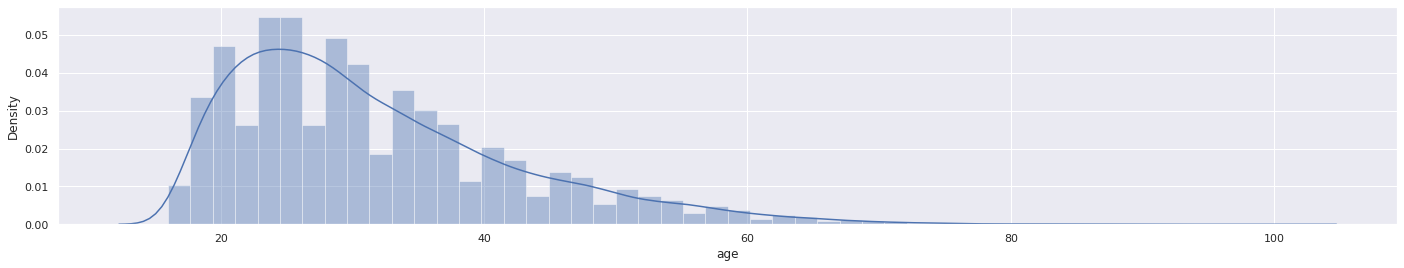

In [25]:
sns.distplot(appdata['age'])

In [26]:
#binning age into age groups
appdata['age_group'] = pd.cut(appdata['age'], [13, 17,34,54,70], labels=['Teens (13-17)', 'Millennials (18-34)', 'Gen X (35-54)', 'Boomers (55-70)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


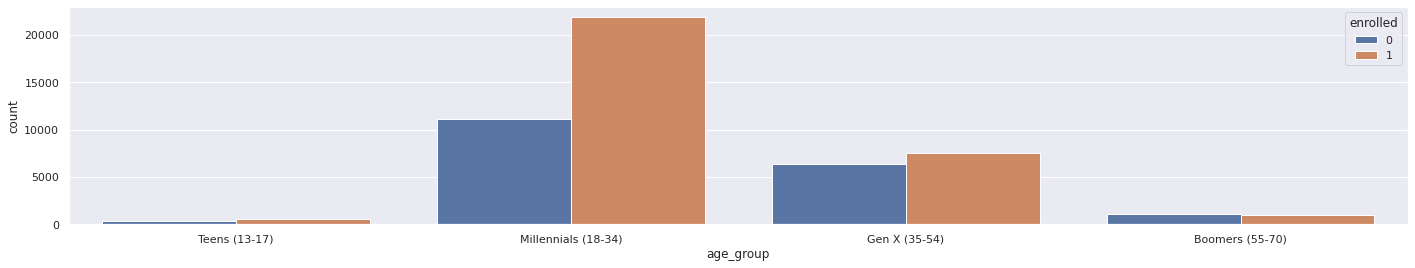

In [27]:
sns.countplot(appdata['age_group'], hue = 'enrolled', data = appdata)

In [28]:
pd.crosstab(appdata['age_group'], appdata['enrolled']).apply(lambda x : x/x.sum(), axis = 1)
#Millennials are the target audience and conversion rate is highest for them

enrolled,0,1
age_group,,
Teens (13-17),0.354002,0.645998
Millennials (18-34),0.336176,0.663824
Gen X (35-54),0.458286,0.541714
Boomers (55-70),0.525248,0.474752


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


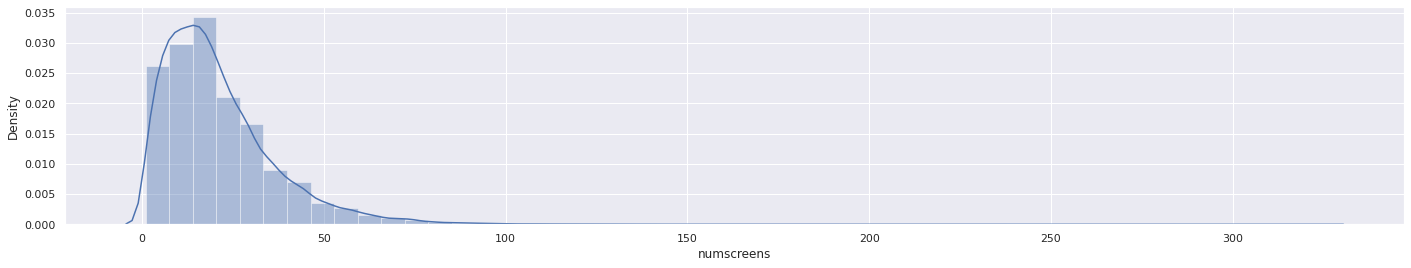

In [29]:
sns.distplot(appdata.numscreens)

In [30]:
#binning num_screens used into groups by count of usage
appdata['num_screen_grp'] = pd.cut(appdata['numscreens'], [0,10,20,30,40,50,60,70,100], labels=['very_less[0-10]','less[10-20]','mod[20-30]','mod_high[30-40]','high[40-50]','very_high[50-60]','v_very_high[60-70]','outliers[70-100]'])
appdata['num_screen_grp'].value_counts()

less[10-20]           15935
very_less[0-10]       13292
mod[20-30]            10329
mod_high[30-40]        5176
high[40-50]            2676
very_high[50-60]       1323
v_very_high[60-70]      644
outliers[70-100]        542
Name: num_screen_grp, dtype: int64

In [31]:
pd.crosstab(appdata['num_screen_grp'], appdata['enrolled']).apply(lambda x : x/x.sum(), axis = 1)

enrolled,0,1
num_screen_grp,,
very_less[0-10],0.565679,0.434321
less[10-20],0.381864,0.618136
mod[20-30],0.271372,0.728628
mod_high[30-40],0.248648,0.751352
high[40-50],0.220478,0.779522
very_high[50-60],0.232804,0.767196
v_very_high[60-70],0.257764,0.742236
outliers[70-100],0.261993,0.738007


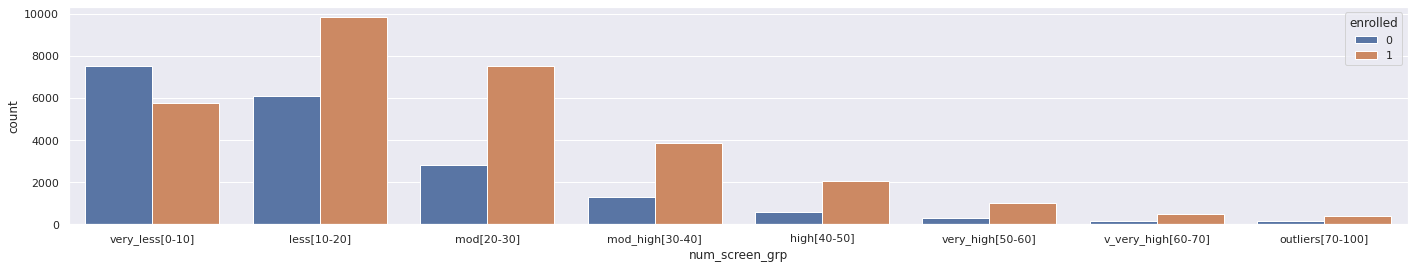

In [32]:
sns.countplot(x = appdata.num_screen_grp, hue = appdata.enrolled)
# Customers who have used screens between 30 to 70 are most likely to enroll

In [33]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   user                  50000 non-null  int64          
 1   first_open            50000 non-null  object         
 2   dayofweek             50000 non-null  int64          
 3   hour                  50000 non-null  int64          
 4   age                   50000 non-null  int64          
 5   screen_list           50000 non-null  object         
 6   numscreens            50000 non-null  int64          
 7   minigame              50000 non-null  int64          
 8   used_premium_feature  50000 non-null  int64          
 9   enrolled              50000 non-null  int64          
 10  enrolled_date         31074 non-null  object         
 11  liked                 50000 non-null  int64          
 12  enroll_Diff           50000 non-null  timedelta64[ns]
 13  f

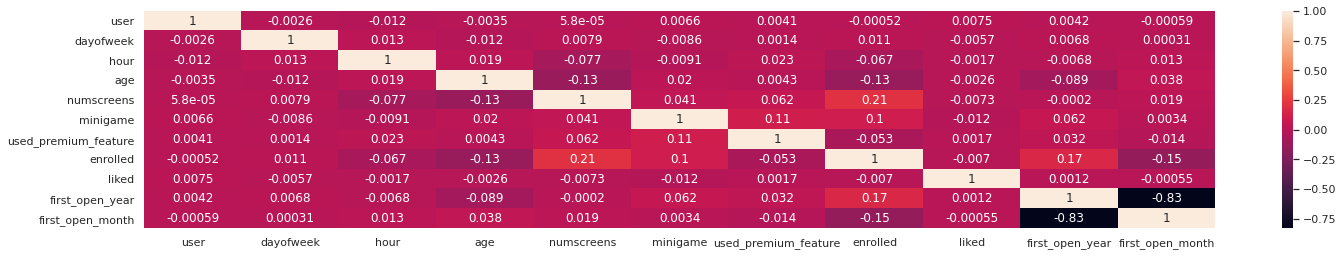

In [34]:
sns.heatmap(appdata.corr(), annot = True)
# age, numscreens,minigame, first_open_year, first_open_month seems to have correlation with enrolled[target]
# There seems to be some form of multi-collinearity between year and month of usage

#### DATA PREPROCESSING AND FEATURE ENGINEERING

In [35]:
# Let's drop certain columns which seems irrelevant
data = appdata.drop(columns = ['user', 'first_open','screen_list','enrolled_date','age_group','num_screen_grp'])
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,enroll_Diff,first_open_year,first_open_month
0,3,2,23,15,0,0,0,0,0 days,2012,12
1,6,1,24,13,0,0,0,0,0 days,2012,12
2,1,19,23,3,0,1,0,1,0 days,2013,3
3,4,16,28,40,0,0,1,0,0 days,2013,7
4,1,18,31,32,0,0,1,1,0 days,2013,2


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dayofweek             50000 non-null  int64          
 1   hour                  50000 non-null  int64          
 2   age                   50000 non-null  int64          
 3   numscreens            50000 non-null  int64          
 4   minigame              50000 non-null  int64          
 5   used_premium_feature  50000 non-null  int64          
 6   enrolled              50000 non-null  int64          
 7   liked                 50000 non-null  int64          
 8   enroll_Diff           50000 non-null  timedelta64[ns]
 9   first_open_year       50000 non-null  int64          
 10  first_open_month      50000 non-null  int64          
dtypes: int64(10), timedelta64[ns](1)
memory usage: 4.2 MB


In [51]:
data['enroll_Diff'] = data['enroll_Diff'].astype(int)
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,enroll_Diff,first_open_year,first_open_month
0,3,2,23,15,0,0,0,0,0,2012,12
1,6,1,24,13,0,0,0,0,0,2012,12
2,1,19,23,3,0,1,0,1,0,2013,3
3,4,16,28,40,0,0,1,0,0,2013,7
4,1,18,31,32,0,0,1,1,0,2013,2


In [53]:
# Splitting the Dataset into independent and dependent variables
X = data.iloc[:,[0,1,2,3,4,5,7,8,9,10]].values
y = data.iloc[:,6].values

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Model building
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2493, 2147],
       [1155, 6705]])

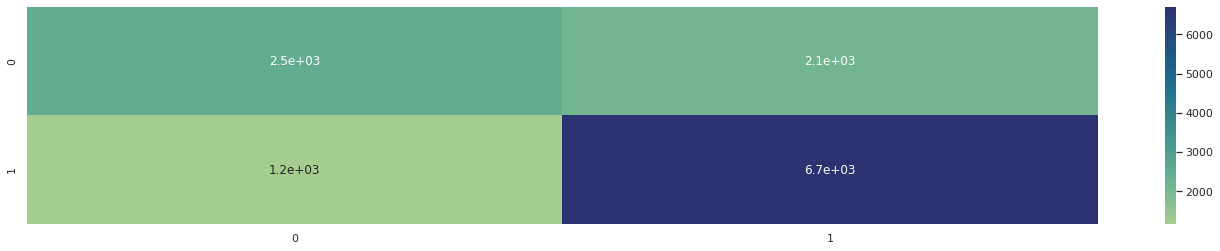

In [62]:
sns.heatmap(cm,annot=True, cmap = "crest")

In [60]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.54      0.60      4640
           1       0.76      0.85      0.80      7860

    accuracy                           0.74     12500
   macro avg       0.72      0.70      0.70     12500
weighted avg       0.73      0.74      0.73     12500



In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train,y_train,
                         scoring = "f1",cv=10)
#A low training error but high cross validation error means its overfit.
# A high training error but low cross validation error means its underfit.

In [74]:
scores

array([0.79306172, 0.79765987, 0.79838384, 0.8108656 , 0.80064244,
       0.79263605, 0.7990226 , 0.79116466, 0.80279441, 0.79448164])

In [75]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#slightly underfitting

Accuracy: 0.80 (+/- 0.01)


In [81]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
y_pred = clf3.predict(X_test)

In [83]:
cr3 = classification_report(y_test,y_pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      4640
           1       0.75      0.73      0.74      7860

    accuracy                           0.68     12500
   macro avg       0.65      0.66      0.66     12500
weighted avg       0.68      0.68      0.68     12500



In [84]:
scores = cross_val_score(clf3, X_train,y_train,
                         scoring = "f1",cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#slightly underfitting

Accuracy: 0.73 (+/- 0.01)


In [ ]:
# Let's go with logistic regression as its accuracy is higher than Decision tree classifier

#### MODEL TUNING

In [87]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = clf,param_grid = parameters,scoring = "accuracy",cv = 10,n_jobs = -1)

In [89]:
grid_search = grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [90]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.73704
{'C': 10, 'penalty': 'l2'}


In [91]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
cr4 = classification_report(y_test,final_predictions)
print(cr4)

              precision    recall  f1-score   support

           0       0.67      0.57      0.61      4640
           1       0.77      0.84      0.80      7860

    accuracy                           0.74     12500
   macro avg       0.72      0.70      0.71     12500
weighted avg       0.73      0.74      0.73     12500

